<h2>Kaan Arı<br>
21628042</h2>
<center>
<img align ="center" src="assets/hacettepe.png" alt="Hacettepe University Logo" width="200\">
<h1>Hacettepe University</h1>
<h1>ELE492 : Image Processing - Homework 3</h1>

___

### Q1)
<br>

```
I pledge that I have not received or given any aid in this homework. 
All the work presented below is my own work.
                                                                              - Kaan Arı | 21628042                                                    
```

<img align ="right" src="assets/signature.png" alt="Hacettepe University Logo" width="250">

___

### Q2)

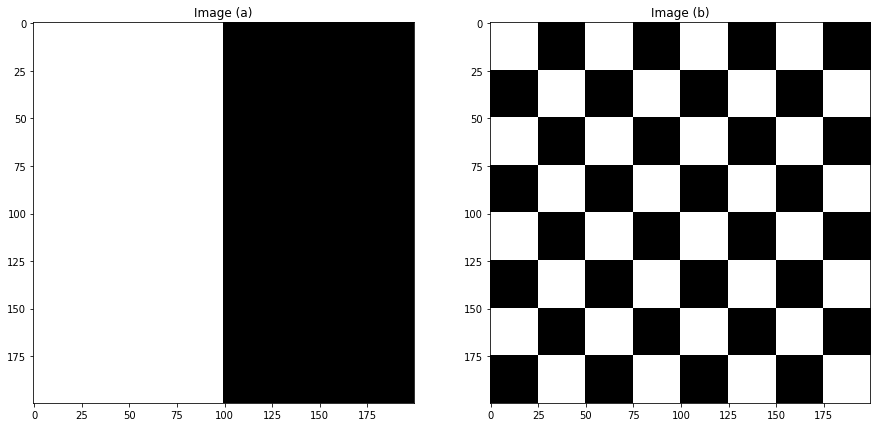

In [8]:
import numpy as np
from matplotlib import pyplot as plt


image_a = np.zeros((1,2))
image_b = None

# GENERATING IMAGE A

image_a[0,0] = 255

image_a = np.repeat(image_a,100,axis=1)
image_a = np.tile(image_a,(200,1))



# GENERATING IMAGE B
# Creating 25x25 px Black Box
black_box = np.zeros((25,25), dtype = np.uint8)
# Creating 25x25 px White Box
white_box = np.ones((25,25), dtype = np.uint8)*255
# Concatenation white and black box side by side.
pattern_b = np.concatenate((white_box, black_box), axis = 1)  
# Creating 50x50 checkerboard pattern(Tile)
pattern_b = np.concatenate((pattern_b,255-pattern_b))

# Extending checkerboard pattern to 200x200.
image_b = np.tile(pattern_b,(4,4))

plt.figure(0, figsize=(15,24))

plt.subplot(1,2,1)
plt.imshow(image_a, cmap = "gray", vmin=0, vmax=255)
plt.title("Image (a)")
plt.imsave("den.png",image_a, cmap="gray")

plt.subplot(1,2,2)
plt.imshow(image_b, cmap = "gray", vmin=0, vmax=255)
plt.title("Image (b)")
plt.imsave("denb.png",image_b, cmap="gray")

plt.show()

___

### Q3)

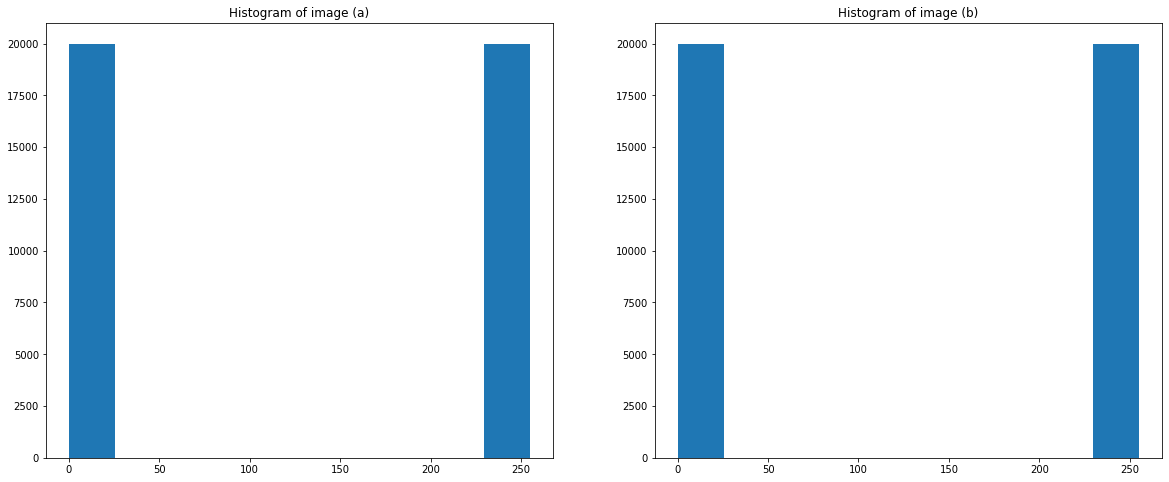

In [2]:
# Calculating and drawing histograms of both
plt.figure(1, figsize=(20,8))

plt.subplot(1,2,1)
plt.hist(image_a.flatten())
plt.title("Histogram of image (a)")

plt.subplot(1,2,2)
plt.hist(image_b.flatten())
plt.title("Histogram of image (b)")

plt.show()

___

### Q4)

In [3]:
import cv2

gaussian_kernel_size = [(7,7),(21,21),(121,121)]
sigmaX = 0 # STD in x-direction / Automatically adjust when it is zero.
sigmaY = 0 # STD in y-direction

image_a_blurred_list = [None, None, None]
image_b_blurred_list = [None, None, None]
# For Kernel Size (7,7)
# Gaussian Smoothing of image a
image_a_blurred_list[0] = cv2.GaussianBlur(image_a, gaussian_kernel_size[0], sigmaX, sigmaY)

# Gaussian Smoothing of image b
image_b_blurred_list[0] = cv2.GaussianBlur(image_b,gaussian_kernel_size[0], sigmaX, sigmaY)

# For Kernel Size (21,21)
# Gaussian Smoothing of image a
image_a_blurred_list[1] = cv2.GaussianBlur(image_a, gaussian_kernel_size[1], sigmaX, sigmaY)

# Gaussian Smoothing of image b
image_b_blurred_list[1] = cv2.GaussianBlur(image_b,gaussian_kernel_size[1], sigmaX, sigmaY)

# For Kernel Size (121,121)
# Gaussian Smoothing of image a
image_a_blurred_list[2] = cv2.GaussianBlur(image_a, gaussian_kernel_size[2], sigmaX, sigmaY)

# Gaussian Smoothing of image b
image_b_blurred_list[2] = cv2.GaussianBlur(image_b,gaussian_kernel_size[2], sigmaX, sigmaY)

As expected in theoretical background, higher dimensional kernel, higher smoothing effect we get. Because, in higher dimensional kernels, we take more pixel values into account to calculate center pixel. 
I proved this statement in the answer of next question by plotting respect to different kernel sizes.

___

### Q5)

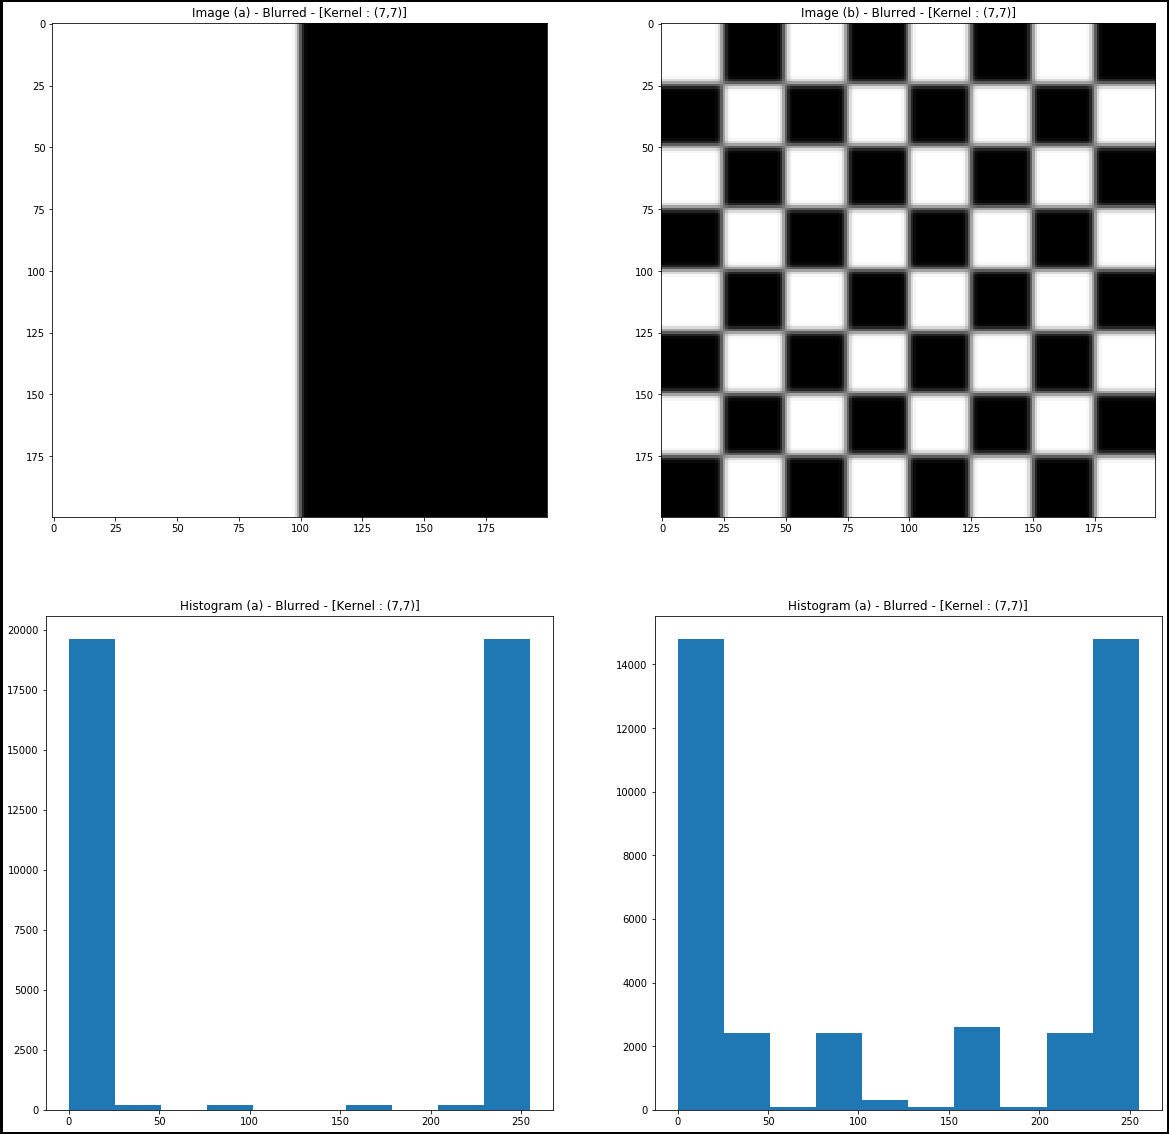

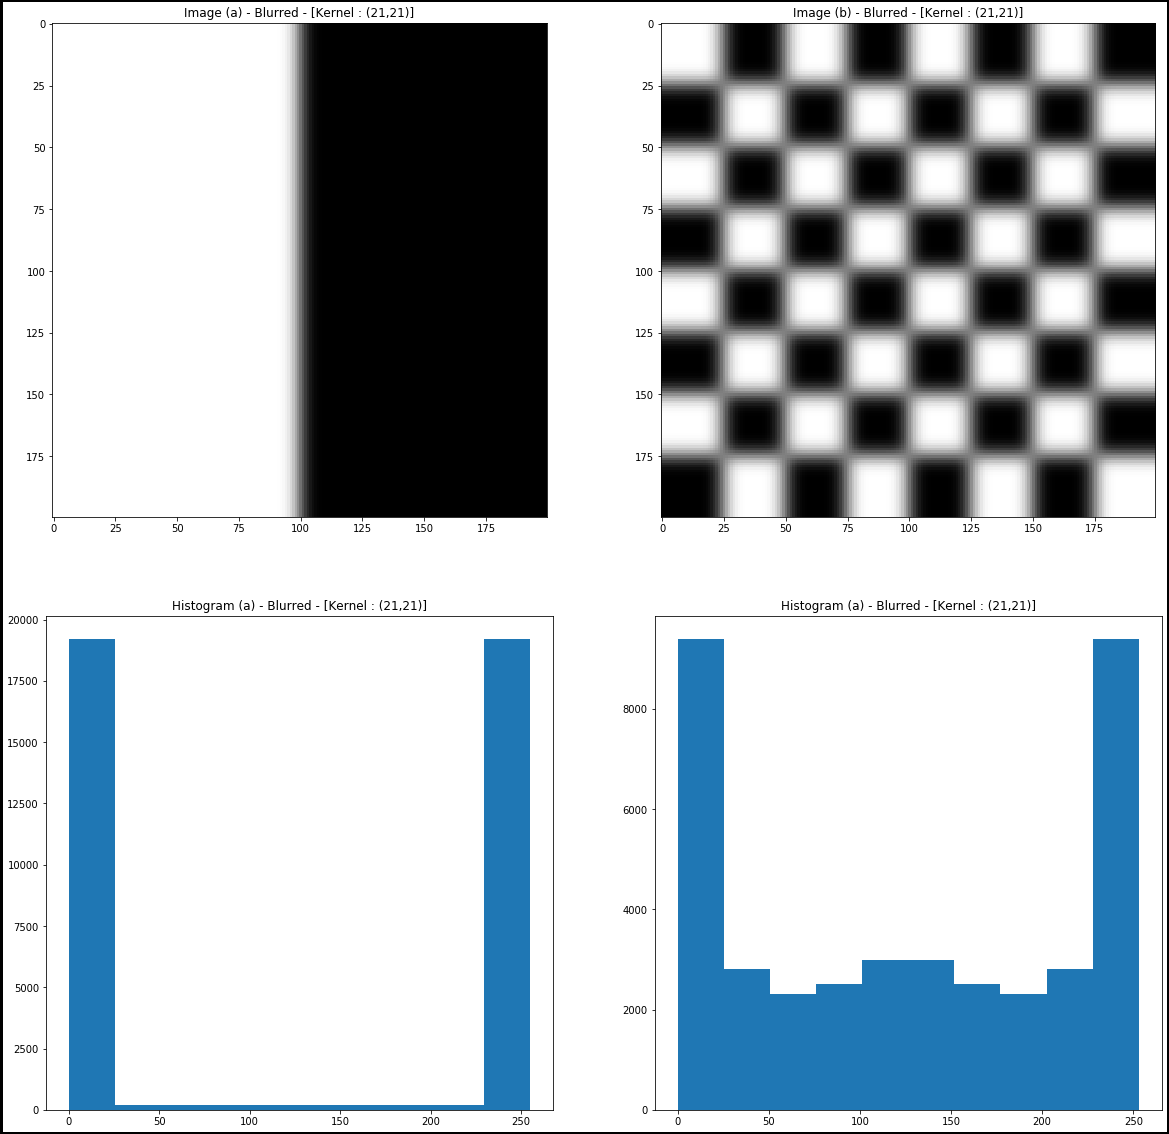

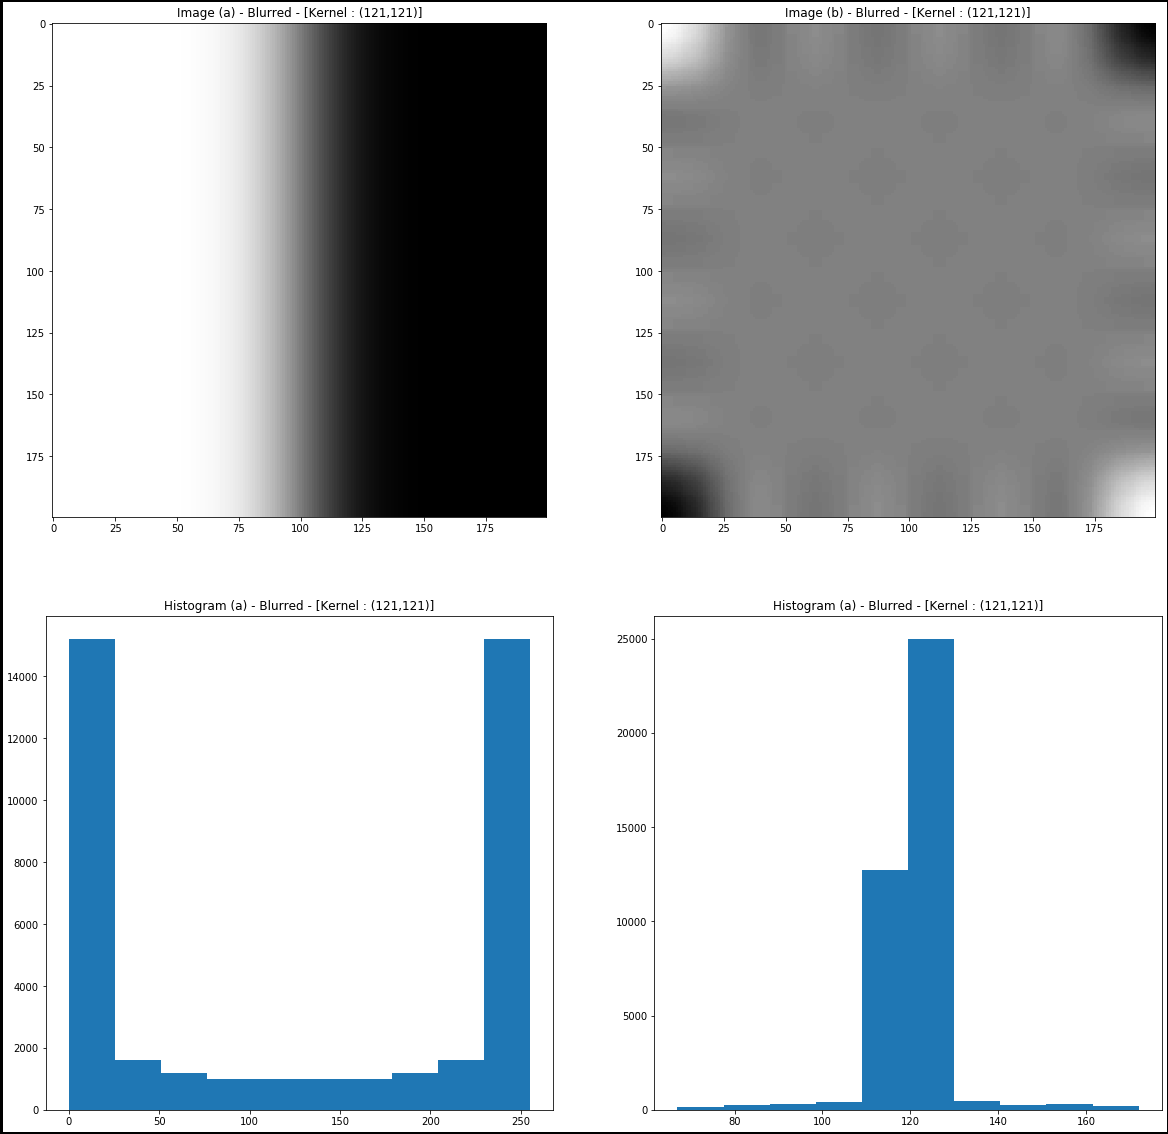

In [4]:
#Plotting images and histograms
fig_num = 0
for image_a_blurred, image_b_blurred in zip(image_a_blurred_list,image_b_blurred_list):
    plt.figure(fig_num, figsize=(20,20), linewidth=5, edgecolor = "#000000")
    fig_num += 1
    
    kernel_size = gaussian_kernel_size[fig_num-1]
    
    plt.subplot(2,2,1)
    plt.imshow(image_a_blurred, cmap="gray")
    plt.title("Image (a) - Blurred - [Kernel : ({},{})]".format(kernel_size[0],kernel_size[1]))

    plt.subplot(2,2,2)
    plt.imshow(image_b_blurred, cmap="gray")
    plt.title("Image (b) - Blurred - [Kernel : ({},{})]".format(kernel_size[0],kernel_size[1]))

    plt.subplot(2,2,3)
    plt.hist(image_a_blurred.flatten())
    plt.title("Histogram (a) - Blurred - [Kernel : ({},{})]".format(kernel_size[0],kernel_size[1]))

    plt.subplot(2,2,4)
    plt.hist(image_b_blurred.flatten())
    plt.title("Histogram (a) - Blurred - [Kernel : ({},{})]".format(kernel_size[0],kernel_size[1]))

    plt.show()

___

### Q6)

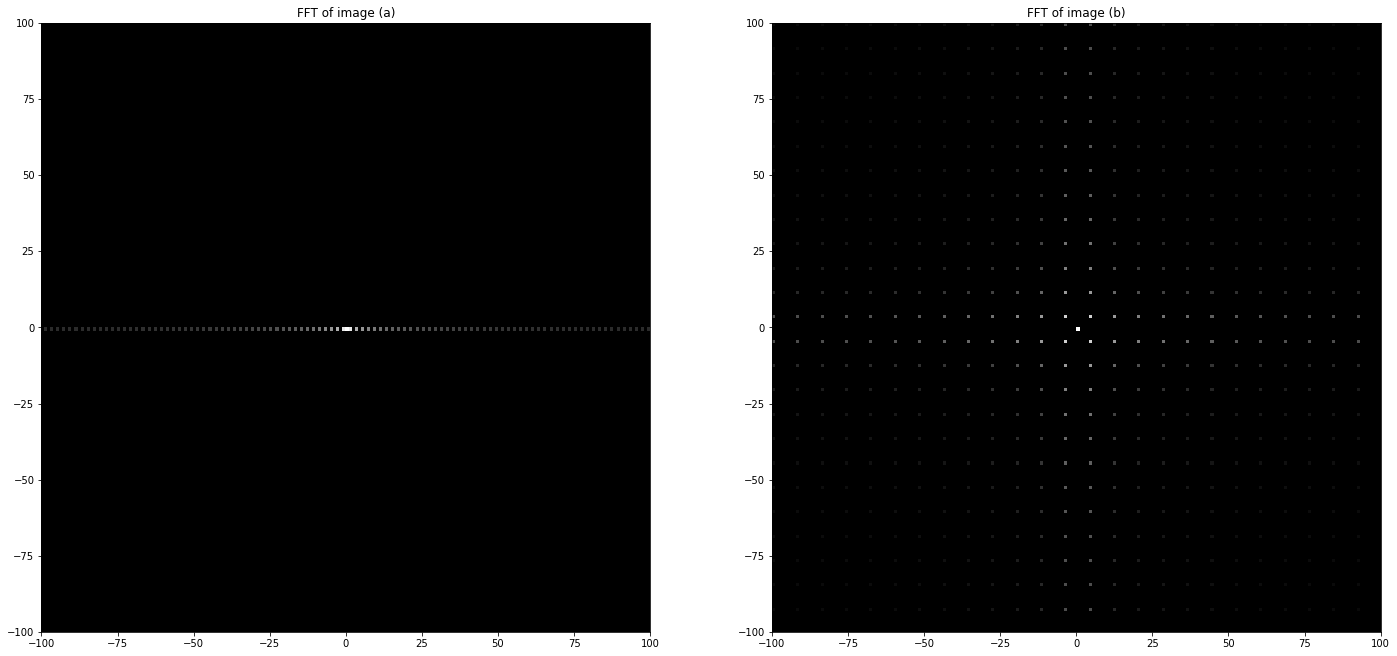

In [5]:
h, w = image_a.shape
# FFT of image a
fft_image_a = np.fft.fft2(image_a)/(h*w)
fft_image_a = np.fft.fftshift(fft_image_a) # FFT shift

# FFT of image b
fft_image_b = np.fft.fft2(image_b)/(h*w)
fft_image_b = np.fft.fftshift(fft_image_b) # FFT shift

# Plotting Magnitude Responses
plt.figure(3, figsize=(24,24))
plt.subplot(1,2,1)
plt.imshow(20*np.log10(1+abs(fft_image_a)), cmap="gray", extent=[-100,100,-100,100])
plt.title("FFT of image (a)")

plt.subplot(1,2,2)
plt.imshow(20*np.log10(1+abs(fft_image_b)), cmap="gray", extent=[-100,100,-100,100])
plt.title("FFT of image (b)")

plt.show()

___

### Q7)

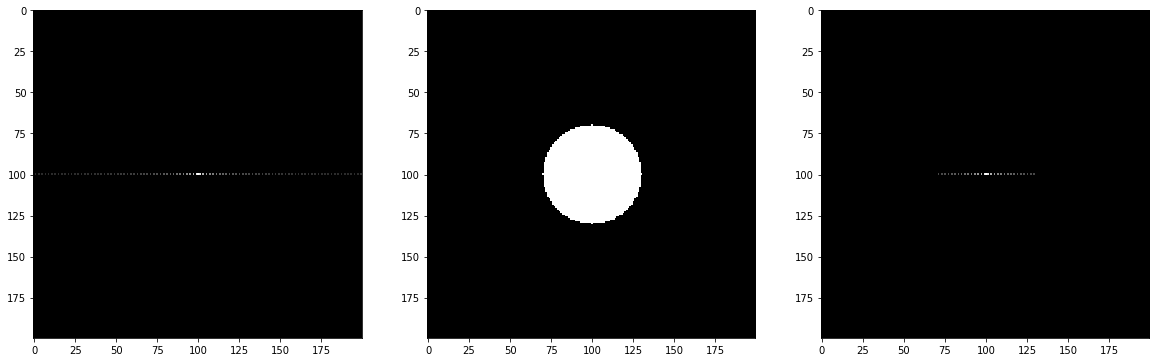

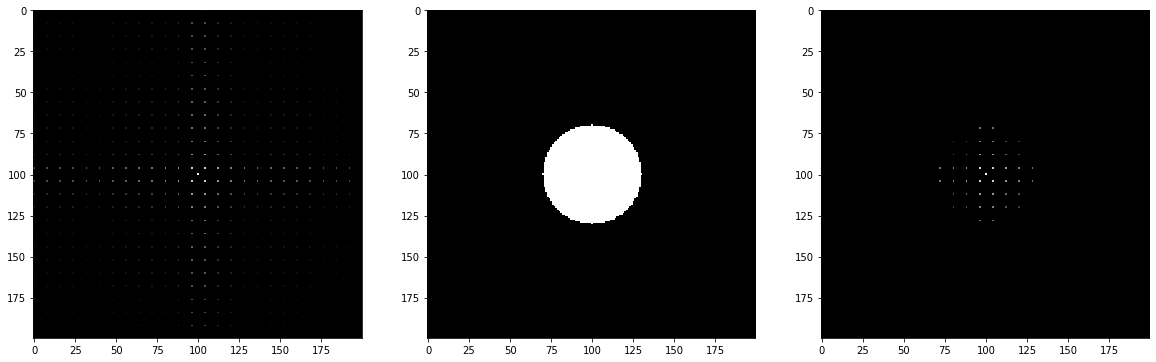

In [6]:
# Filtering

def ideal_lpf(cutoff):
    """
    Ideal LPF generator fucntion
    return: LPF Frequency domain response
    """
    ideal_lpf = np.zeros((200,200))
    cv2.circle(ideal_lpf, (100,100), cutoff, 1, -1)
    
    return ideal_lpf


# Generate LPF
filter_cutoff = 30
filter_response = ideal_lpf(filter_cutoff)

# Filtering image a
filtered_a = filter_response*fft_image_a

# Filterin image b
filtered_b = filter_response*fft_image_b

# Plotting Filtering Operation
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(20*np.log10(1+abs(fft_image_a)), cmap = "gray")
plt.subplot(1,3,2)
plt.imshow(filter_response, cmap = "gray")
plt.subplot(1,3,3)
plt.imshow(20*np.log10(1+abs(filtered_a)), cmap = "gray")
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(20*np.log10(1+abs(fft_image_b)), cmap = "gray")
plt.subplot(1,3,2)
plt.imshow(filter_response, cmap = "gray")
plt.subplot(1,3,3)
plt.imshow(20*np.log10(1+abs(filtered_b)), cmap = "gray")
plt.show()

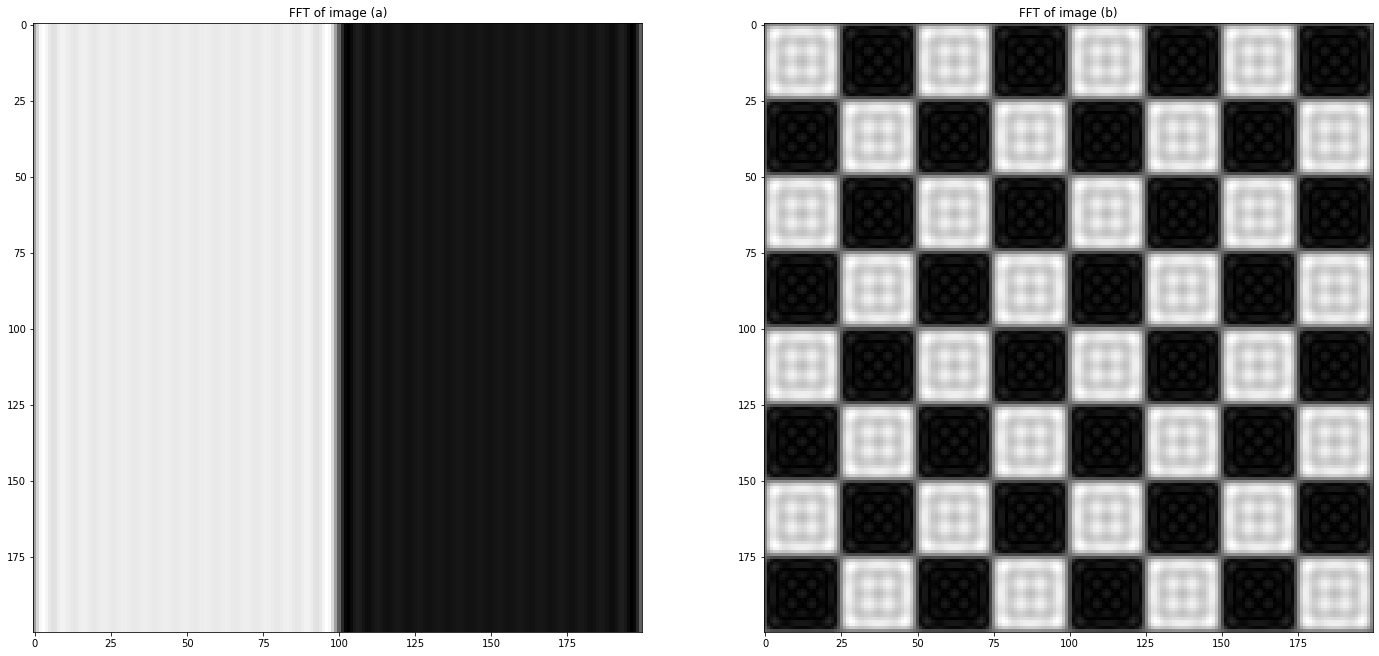

In [7]:
# Inverse FFT transforms of image a
ifft_image_a = np.fft.ifft2(np.fft.ifftshift(filtered_a*h*w)) # Inverse FFT of image a
ifft_image_a = (ifft_image_a.real) # Use Real Part of IFFT
min_a = np.min(ifft_image_a)
max_a = np.max(ifft_image_a)
ifft_image_a = (ifft_image_a - min_a)/(max_a - min_a) # Normalizing the result.

# Inverse FFT transforms of image a
ifft_image_b = np.fft.ifft2(np.fft.ifftshift(filtered_b*h*w)) # Inverse FFT of image a
ifft_image_b = (abs(ifft_image_b)) # Convert to 8-bit unsigned.
min_b = np.min(ifft_image_b)
max_b = np.max(ifft_image_b)
ifft_image_b = (ifft_image_b - min_b)/(max_b - min_b) # Normalizing the result.

# Plotting Results
plt.figure(3, figsize=(24,24))
plt.subplot(1,2,1)
plt.imshow(np.abs(ifft_image_a), cmap="gray")
plt.title("FFT of image (a)")

plt.subplot(1,2,2)
plt.imshow(np.abs(ifft_image_b), cmap="gray")
plt.title("FFT of image (b)")
plt.show()

As we can see from the results above, the ideal low pass filter does not work as its name suggests. Edges in the images causes **ringing effect** (also known as Gibbs Phenomenon) when ideal LPF is used.

In ideal LPF in frequency domain, when we increase the LPF radius (cutoff), then smoothing effect reduces. Otherwise, If we increase LPF radius, then we get more smoothing effect.

Fortunately, when Gaussian filter is used, there is no ringing effect at the output.